In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI,GoogleGenerativeAI
from langgraph.graph import StateGraph,START,END
from pydantic import BaseModel,Field
from dotenv import load_dotenv
from typing import TypedDict,Annotated,Literal
import operator


load_dotenv()

True

In [5]:
model = ChatGoogleGenerativeAI(model = "gemini-1.5-flash")

In [8]:
class quad(TypedDict):
    a : int
    b : int
    c : int

    eqn : str
    d : float
    ans : str

In [17]:
def show_eqn(state : quad):
    eq = f'{state['a']}x2 + {state["b"]}x + {state["c"]}'
    return {'eqn' : eq}


In [18]:
def discriminant(state : quad):
    d = state['b']**2 - (4 * state['a'] * state['c'])

    return {'d':d}

In [24]:
def real_roots(state : quad):
    root1 = (-state["b"] + state["d"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state['d']**0.5)/(2*state["a"])
                                   
    ans = f'The roots are {root1} and {root2}'
    return {'ans': ans}

In [26]:
def repeated_roots(state : quad):
    root = -state["b"] / (2*state["a"])
                                   
    ans = f'Only repeating root is {root}'
    return {'ans': ans}

In [27]:
def no_roots(state : quad):
    ans = f'No Real Roots'
    return {'ans': ans}

In [30]:
def check(state:quad)->Literal['real_roots','repeated_roots','no_roots']:
    if state['d'] > 0:
        return 'real_roots'
    elif state['d'] == 0:
        return 'repeated_roots'
    else :
        return 'no_roots'

In [36]:
graph = StateGraph(quad)

graph.add_node('show_eqn',show_eqn)
graph.add_node('discriminant',discriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('repeated_roots',repeated_roots)
graph.add_node('no_roots',no_roots)


graph.add_edge(START,'show_eqn')
graph.add_edge('show_eqn','discriminant')

graph.add_conditional_edges('discriminant',check)

graph.add_edge('real_roots',END)
graph.add_edge('repeated_roots',END)
graph.add_edge('no_roots',END)

workflow = graph.compile()

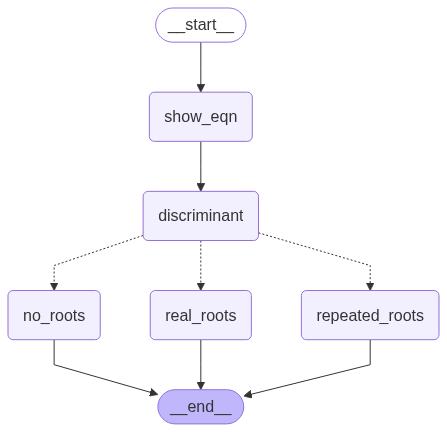

In [37]:
workflow

In [38]:
initial_state = {
    'a' : 4,
    'b' : - 5,
    'c' : 1
}

workflow.invoke(initial_state)

{'a': 4,
 'b': -5,
 'c': 1,
 'eqn': '4x2 + -5x + 1',
 'd': 9,
 'ans': 'The roots are 1.0 and 0.25'}